## THE SPARKS FOUNDATION

## GRIPSEPT2021 - Data Science and Business Analytics

### Task 2 : Prediction using unsupervised Machine Learning

#### Prepared by Bhargavi K C

The problem statement is to predict the optimum number of clusters from the given 'Iris' dataset and represent it visually.

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

#### Reading the dataset

In [2]:
df = pd.read_csv('Task 2 - Iris.csv')
df.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### Features of the dataset

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

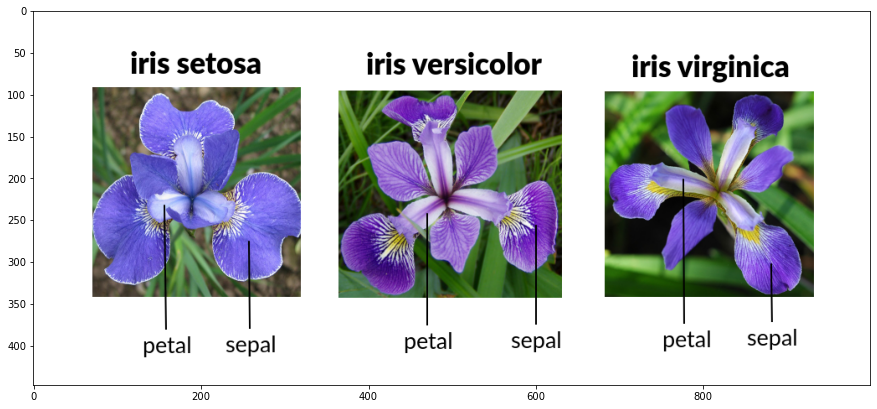

In [9]:
import matplotlib.image as mpimg
plt.figure(figsize=(15,10))
img = mpimg.imread('Iris species.png')
plt.imshow(img);

#### Dropping 'Id' column

In [10]:
df = df.drop('Id', axis=1)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Visualization - Pairplot

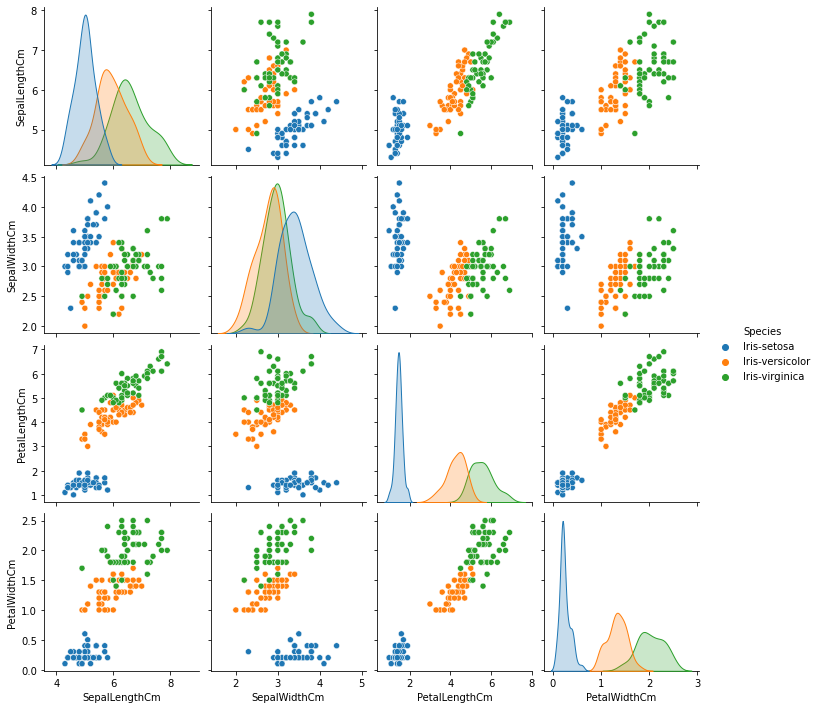

In [11]:
sns.pairplot(df, hue = 'Species');

#### Check for outliers - Boxplots

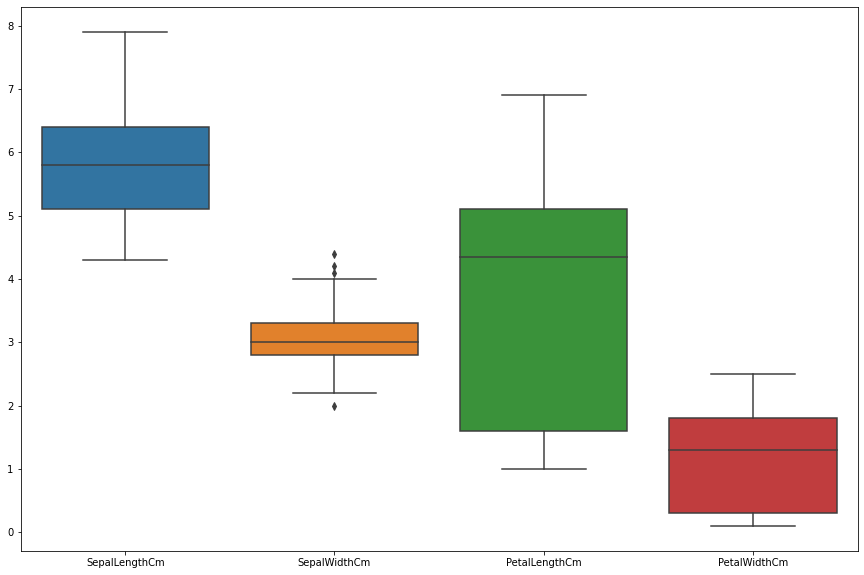

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df);

#### Treatment of outliers

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
lsw,usw=remove_outlier(df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']>usw,usw,df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']<lsw,lsw,df['SepalWidthCm'])

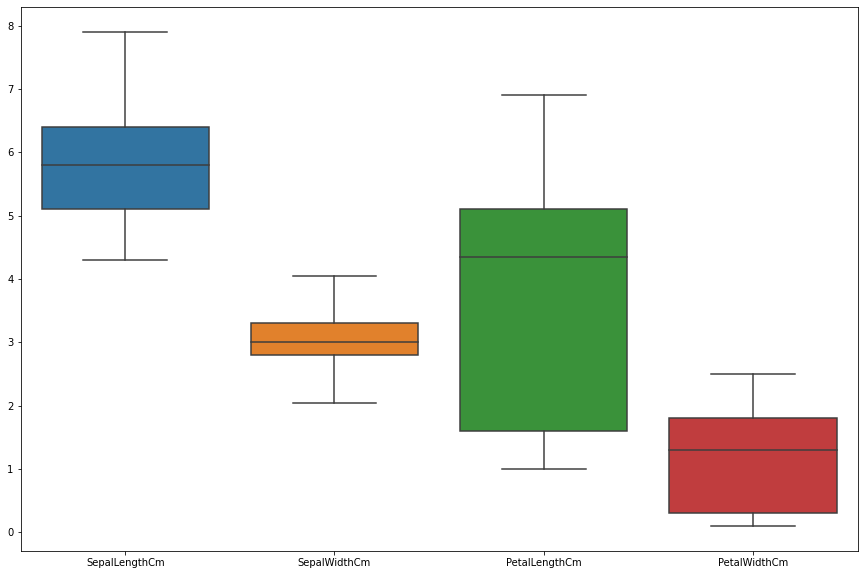

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df);

#### Creating clusters using K-Means

#### Calculating WSS for other values of K - Elbow Method

In [16]:
df1 = df.iloc[:,:-1]

In [17]:
wss =[] 

In [18]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(df1)
    wss.append(KM.inertia_)

C:\Users\Bhargavi K C\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
wss

[679.4767333333333,
 151.3707284574986,
 78.01971239388794,
 56.40796250000001,
 45.65171944444446,
 38.29706675337547,
 33.55174845807427,
 29.34966512474094,
 27.530412878787896,
 25.80657341269842]

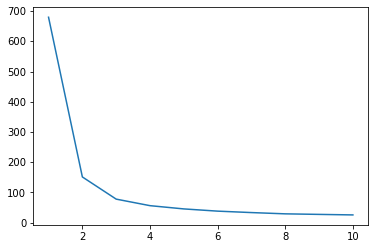

In [20]:
plt.plot(range(1,11), wss);

In the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3. We will further evaluate the clusters using silhouette score.

#### Cluster evaluation

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [22]:
# Calculating silhouette_score for 4 clusters
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=0)

0.49948226117505407

In [23]:
# Calculating silhouette_score for 3 clusters
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=0)

0.553965609667943

Silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3.

#### Appending Clusters to the original dataset

In [24]:
df["kmeans3"] = labels
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,kmeans3
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


#### Cluster Profiling

In [25]:
clust_profile = df.groupby('kmeans3').mean()
clust_profile['freq'] = df.kmeans3.value_counts().sort_index()
clust_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,freq
kmeans3,,,,,
0,5.901613,2.749194,4.393548,1.433871,62
1,5.006000,3.407000,1.464000,0.244000,50
2,6.850000,3.073684,5.742105,2.071053,38


Cluster 0 - Medium sized flowers.

Cluster 1 - Small sized flowers with the least sepal lengths, petal lengths and petal widths, and highest sepal widths.

Cluster 2 - Big sized flowers with the highest sepal lengths, petal lengths and petal widths.

#### Visualizing the clusters

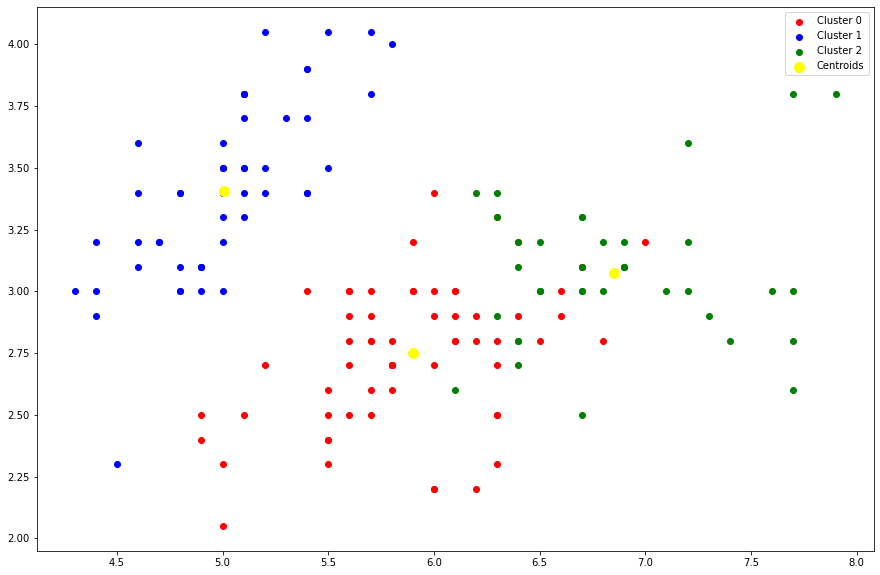

In [26]:
x = df.iloc[:, [0, 1, 2, 3]].values

kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,10))

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Cluster 2')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();
